<a href="https://colab.research.google.com/github/Shreya21-2003/Flipkart-Customer-Satisfaction-model/blob/main/Flipkart_Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name- Flipkart Customer Satisfaction**

**Project Type** - Classification
**Contribution** - Individual

**Project Summary:-**

In this project, I developed a Machine Learning-based predictive system to classify CSAT (Customer Satisfaction) Scores using various input features. The dataset presented challenges such as class imbalance, which I addressed using SMOTE (Synthetic Minority Oversampling Technique).

I performed a detailed Exploratory Data Analysis (EDA) using visualizations like bar charts, pie charts, count plots, box plots, histograms, violin plots, strip plots, area plots, heatmaps, and line plots. These helped me understand the data distribution, trends, and potential relationships. Insights gained from these visualizations supported the formulation and testing of hypotheses, such as:

Higher CSAT scores may correlate with specific feature ranges.

Certain customer attributes may contribute more significantly to high satisfaction.

Some features may exhibit outliers affecting model performance.

After data preprocessing (including scaling, outlier handling, and applying SMOTE), I built and evaluated several machine learning models:

Logistic Regression

Random Forest Classifier

XGBoost Classifier (chosen as the final model due to superior performance)

I evaluated these models using metrics like Accuracy, Precision, Recall, F1-Score, and Confusion Matrix to ensure reliable predictions that align with business goals.

For model explainability, I used SHAP (SHapley Additive exPlanations) to interpret feature importance and understand which factors drive the model’s predictions. This transparency enables data-driven decision-making and provides valuable insights for business improvement.

Overall, I have created a scalable, interpretable, and effective machine learning pipeline that can be integrated into business operations for CSAT prediction, enabling proactive customer engagement and improved satisfaction outcomes.

**GitHub Link -** https://github.com/Shreya21-2003/Flipkart-Customer-Satisfaction-model.git

**Problem Statement**:-

**Identifying the key contributers of customer satisfaction and service team performance at Flipkart, with the goal of improving support quality, optimizing CSAT scores, and enhancing customer retention.**

# **CODE**

**Import Libraries**

In [2]:
!pip install contractions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox, yeojohnson, skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.0 MB/s eta 0:00:00


**Load Dataset**

In [3]:
df = pd.read_csv('/content/Customer_support_data.csv')


**Dataet view**

In [5]:
print(df.head())
print(df.tail())

                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-

**Dataset Rows & Columns count**

In [6]:
print("Shape of the dataset:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Shape of the dataset: (85907, 20)
Number of rows: 85907
Number of columns: 20


**Dataset Information**

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

**Duplicate Values**

In [6]:
# Count duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])
if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


**Missing Values/Null Values**

In [7]:
# Check for missing/null values column-wise
missing_values = df.isnull().sum()
print("\nMissing/Null values per column:")
print(missing_values[missing_values > 0])




Missing/Null values per column:
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
dtype: int64


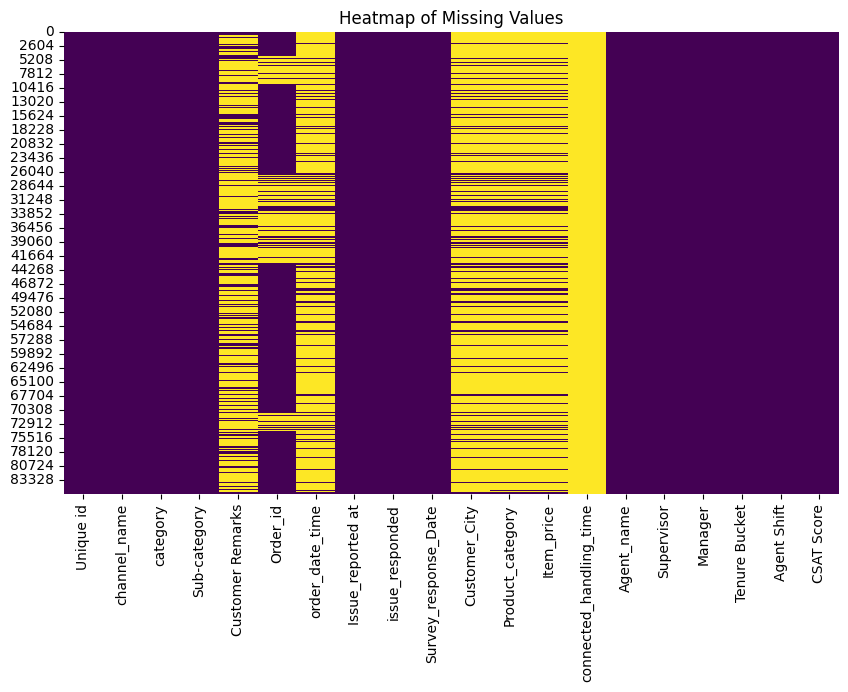

In [8]:
# Visualize missing data as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()


**What I know about your dataset-**


**Understanding Variables**

In [9]:
# Dataset Columns
print(df.columns.tolist())


['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [10]:
# Dataset Describe
print(df.describe())
print(df.describe(include=['object', 'category']))

          Item_price  connected_handling_time    CSAT Score
count   17206.000000               242.000000  85907.000000
mean     5660.774846               462.400826      4.242157
std     12825.728411               246.295037      1.378903
min         0.000000                 0.000000      1.000000
25%       392.000000               293.000000      4.000000
50%       979.000000               427.000000      5.000000
75%      2699.750000               592.250000      5.000000
max    164999.000000              1986.000000      5.000000
                                   Unique id channel_name category  \
count                                  85907        85907    85907   
unique                                 85907            3       12   
top     07c7a878-0d5a-42e0-97ef-de59abec0238      Inbound  Returns   
freq                                       1        68142    44097   

                  Sub-category Customer Remarks  \
count                    85907            28742   
unique 

**Variables Description**:-


**Unique values**

In [11]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(unique_vals[:10])


['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880'
 'eb0d3e53-c1ca-42d3-8486-e42c8d622135'
 'ba903143-1e54-406c-b969-46c52f92e5df'
 '1cfde5b9-6112-44fc-8f3b-892196137a62'
 '11a3ffd8-1d6b-4806-b198-c60b5934c9bc'
 '372b51a5-fa19-4a31-a4b8-a21de117d75e'
 '6e4413db-4e16-42fc-ac92-2f402e3df03c'
 'b0a65350-64a5-4603-8b9a-a24a4a145d08']
['Outcall' 'Inbound' 'Email']
['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related']
['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request']
[nan 'Very good'
 "Shopzilla app and it's all coustomer care services is very good service provided all time"
 'Very bad' 'Something ' 'All good' 'Good ' 'Godd job'
 'Issue not resolved pathetic servi

**Data Wrangling**

**What all manipulations I done and insights I found-**

*Answer: *  Manipulations done:-
1. Explored the dataset with head() and tail() command and info() caommand to understand the data tpes in the dataset.
2. Identified the shape of the dataset.
3. Filled missing values using forward fill (ffill()) and replaced any remaining with 0 (fillna(0)).
4. Converted the order_date_time column to proper datetime format using pd.to_datetime().
5. Used LabelEncoder to convert categorical columns into numeric form.

Insights found:-
1. With clean as well as structured data it is now possible to perform feature engineering, model trainig and evaluation.
2 .The consistency of the data has been improved when the missing values were handeled as they could have later caused descripancies in the model training.
3. It is now possible to perform time based analysis because of the conversion performed of the 'order_date_time' to datetime format.
4. Label encoding helped in making the data capable of being used for machine learning algorithms, which typically require numerical input, to process categorical data.

In [12]:
# Fill missing values
df = df.ffill()  # Forward fill
df = df.fillna(0)  # Fill remaining with 0

# Convert Columns to Correct Data Types
df['order_date_time'] = pd.to_datetime(df['order_date_time'])

# Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].astype(str)  # Ensure uniform data type
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("Categorical variables encoded.")


Categorical variables encoded.


**EDA**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unique id                 85907 non-null  int64         
 1   channel_name              85907 non-null  int64         
 2   category                  85907 non-null  int64         
 3   Sub-category              85907 non-null  int64         
 4   Customer Remarks          85907 non-null  object        
 5   Order_id                  85907 non-null  int64         
 6   order_date_time           85907 non-null  datetime64[ns]
 7   Issue_reported at         85907 non-null  datetime64[ns]
 8   Customer_City             85907 non-null  int64         
 9   Product_category          85907 non-null  int64         
 10  Item_price                85907 non-null  float64       
 11  connected_handling_time   85907 non-null  float64       
 12  Agent_name        

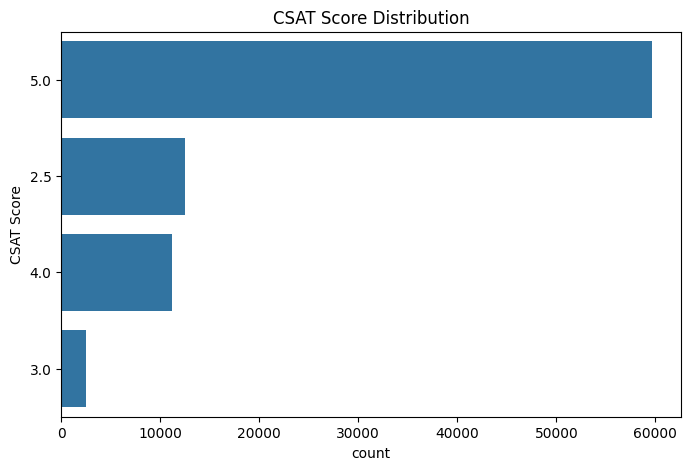

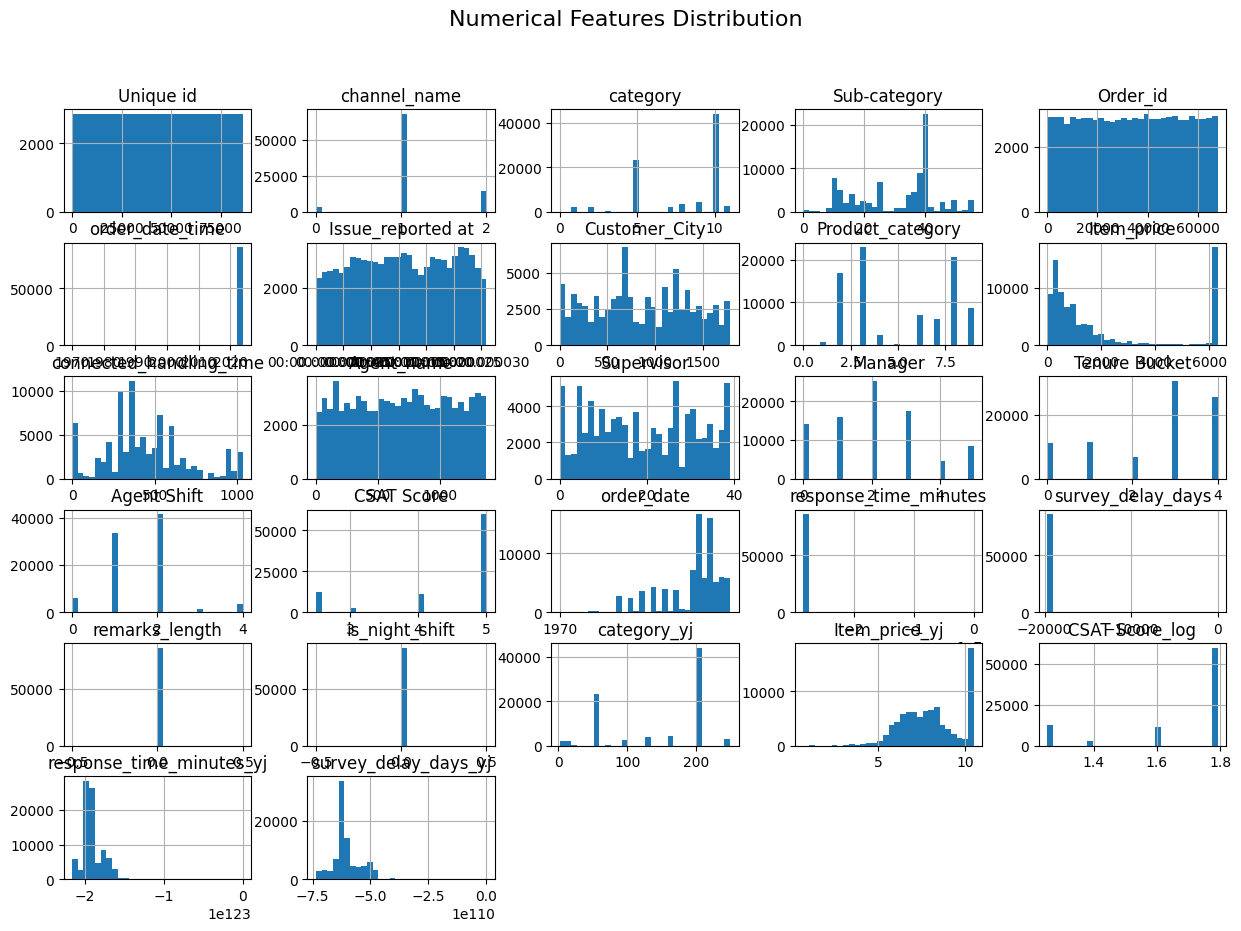

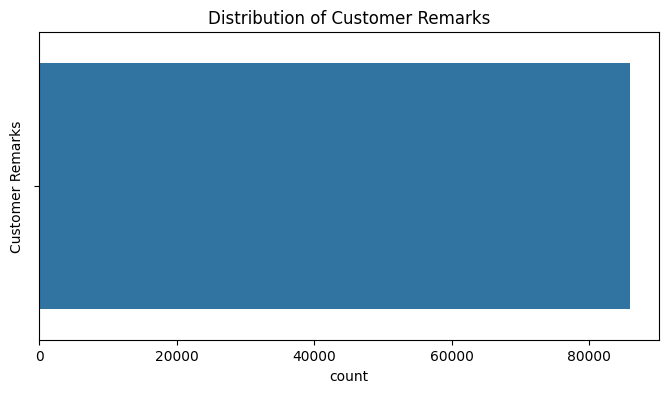

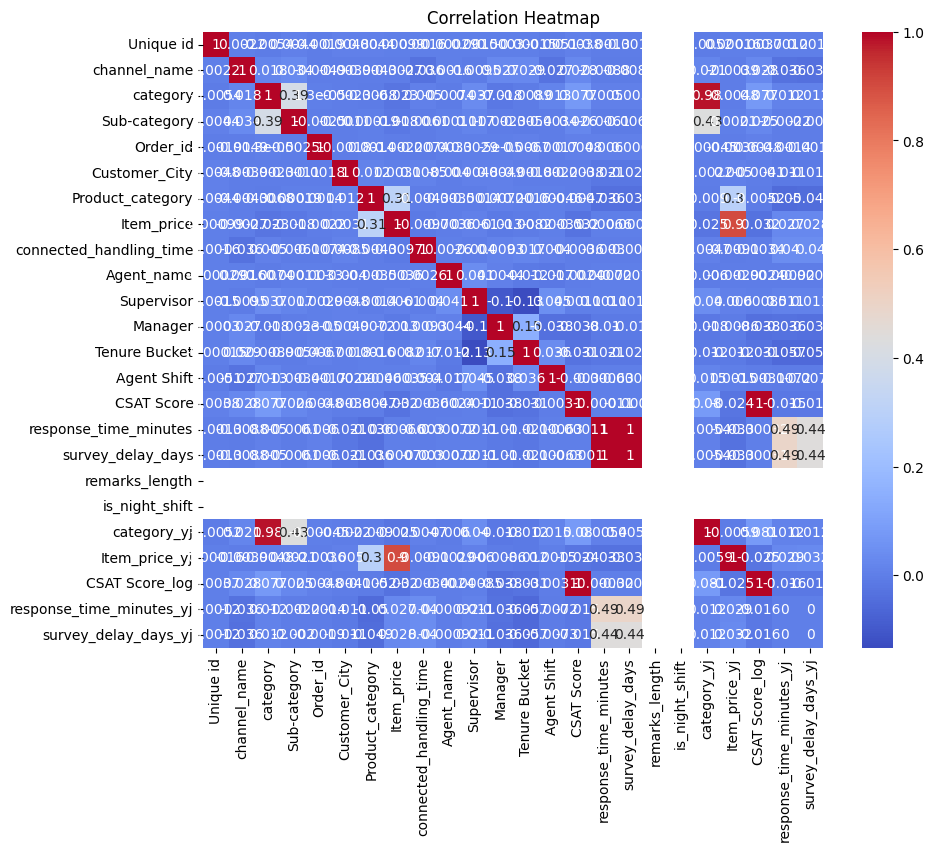

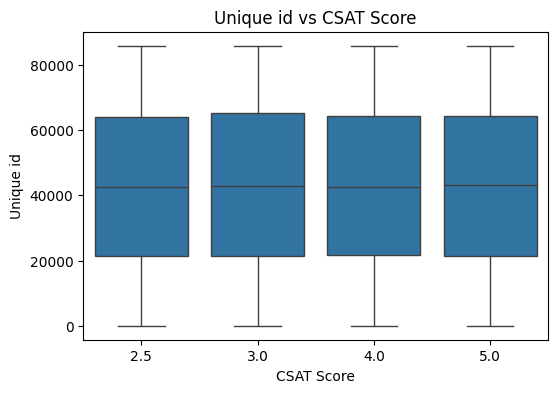

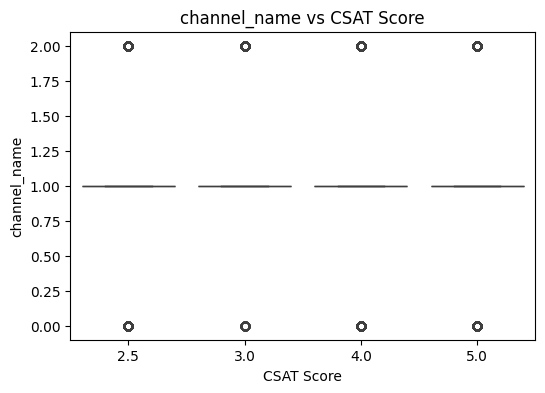

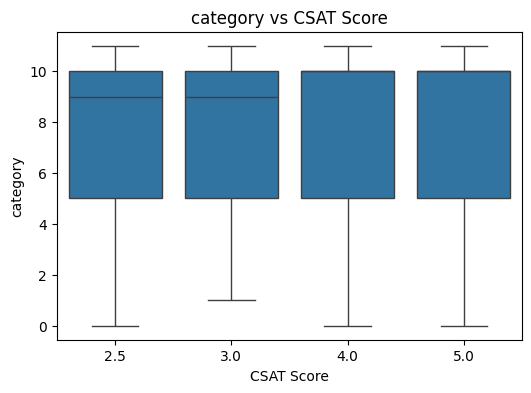

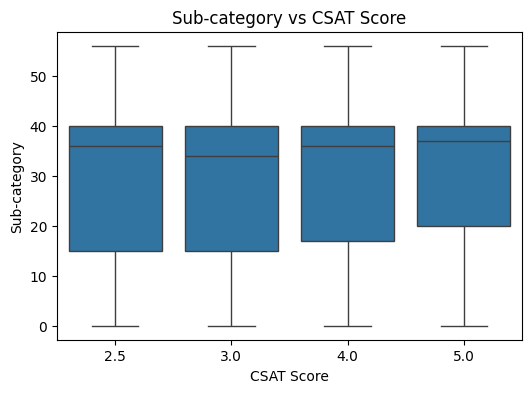

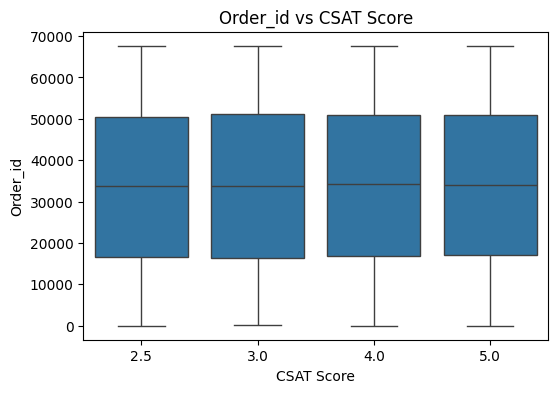

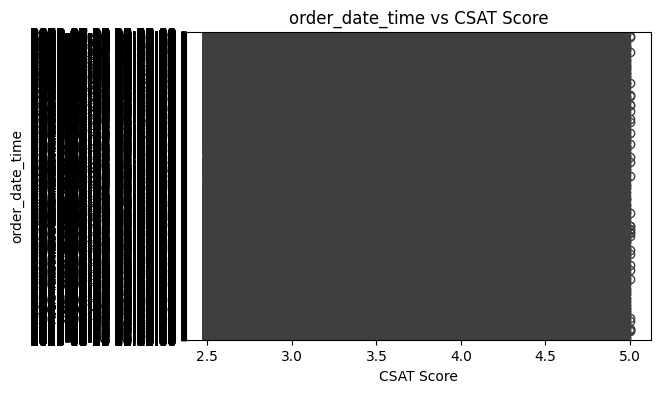

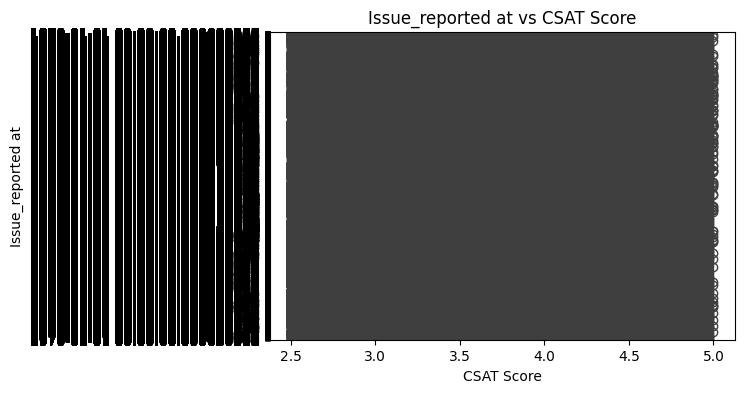

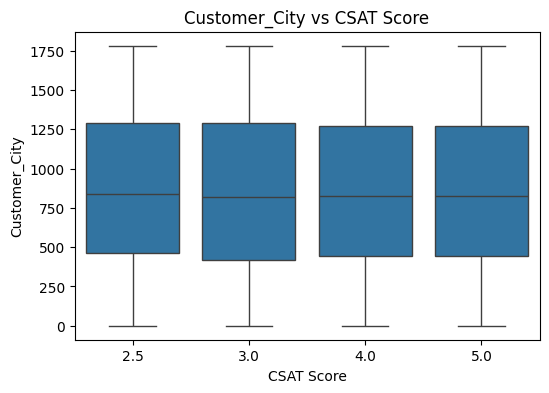

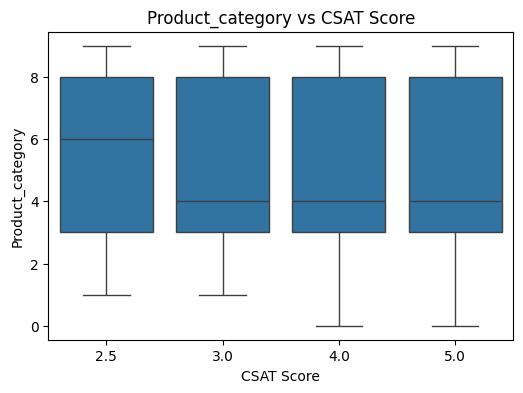

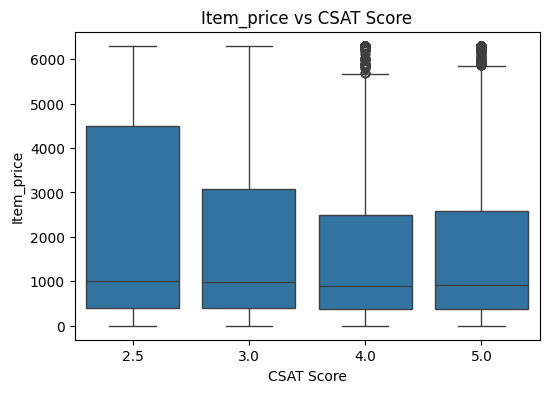

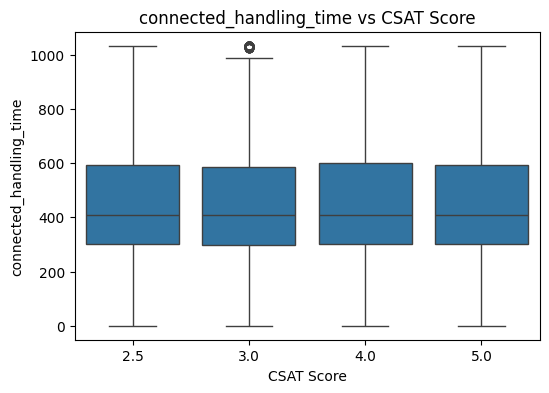

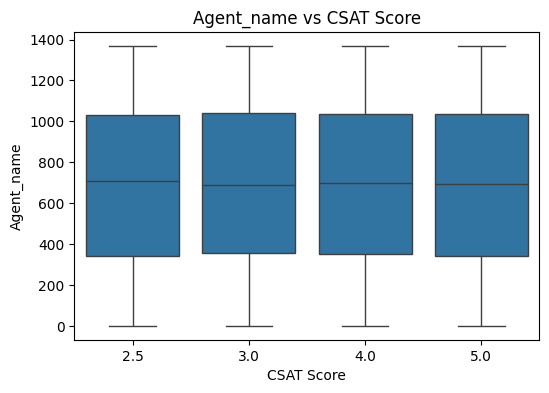

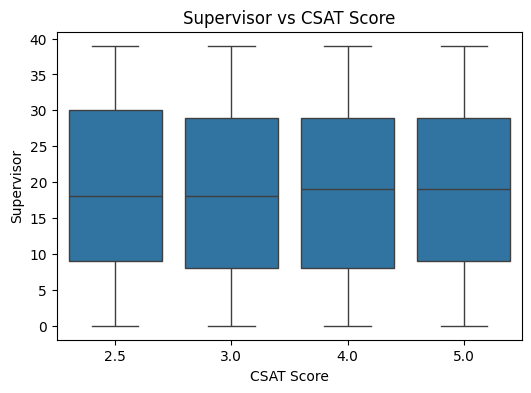

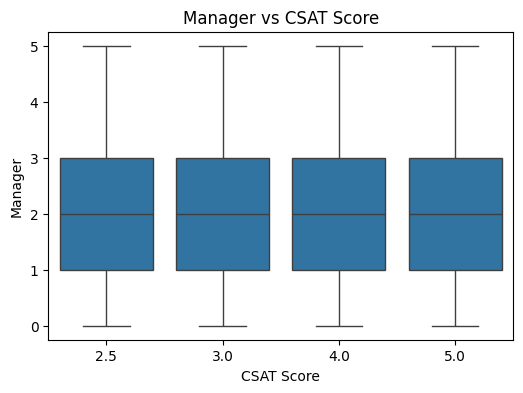

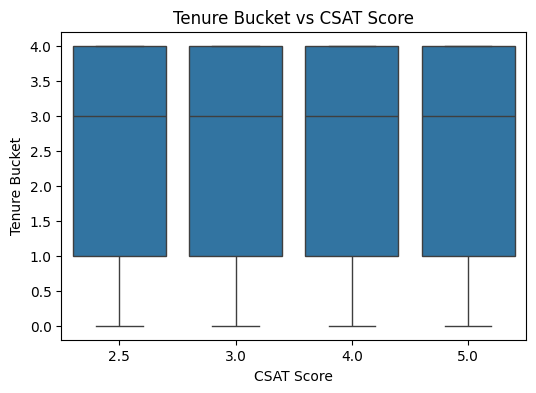

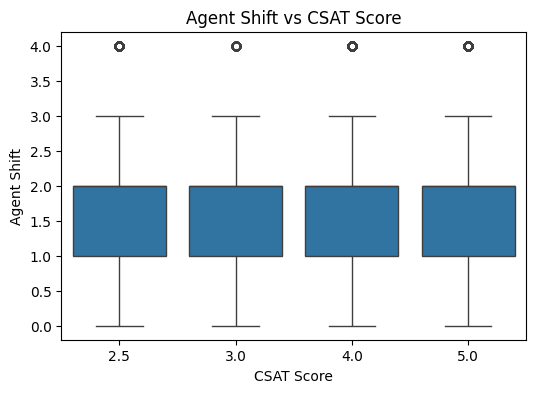

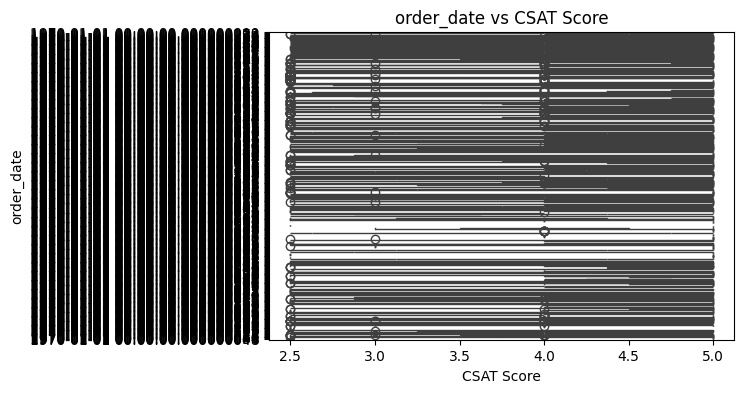

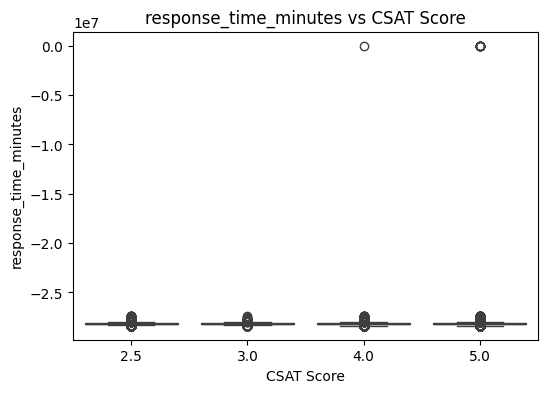

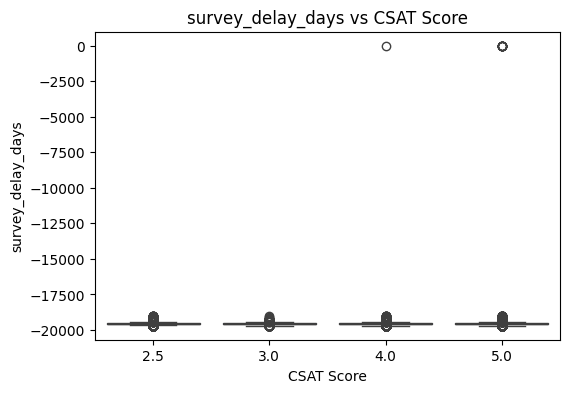

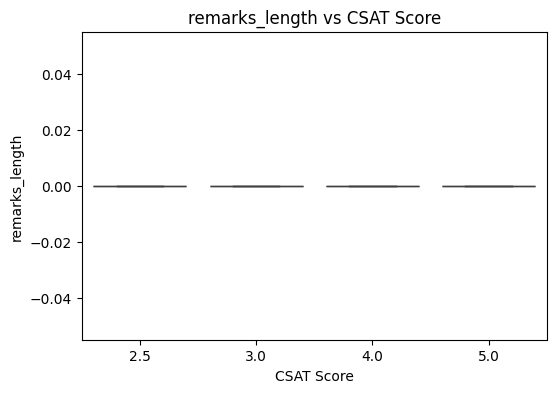

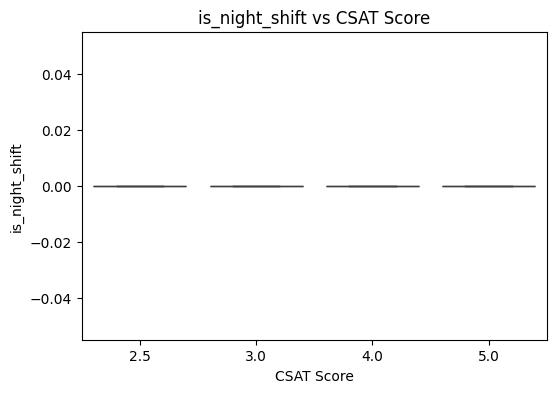

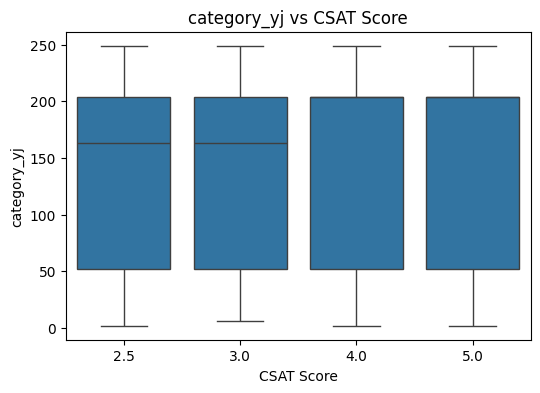

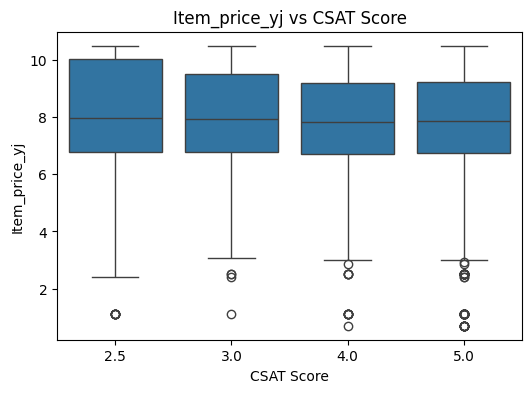

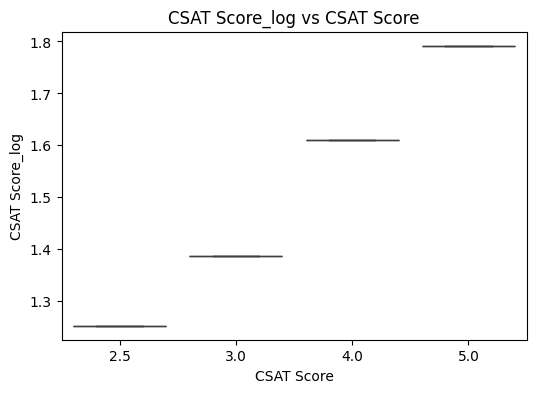

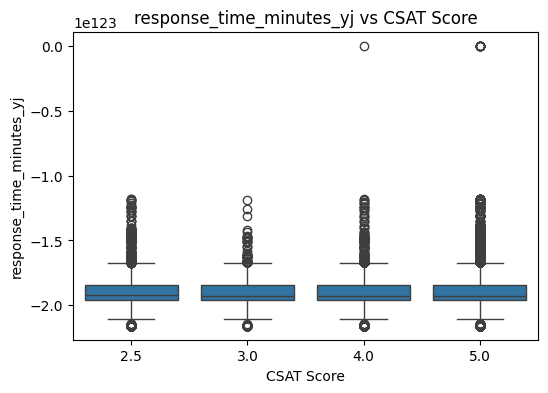

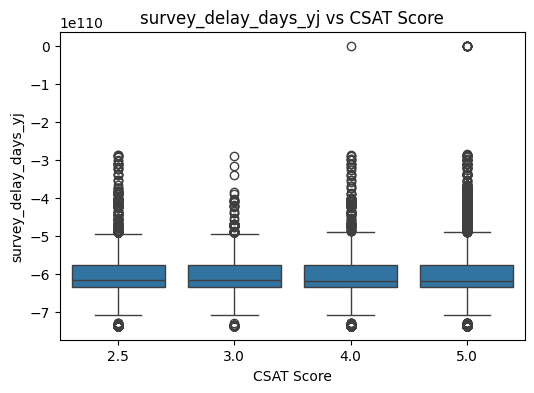

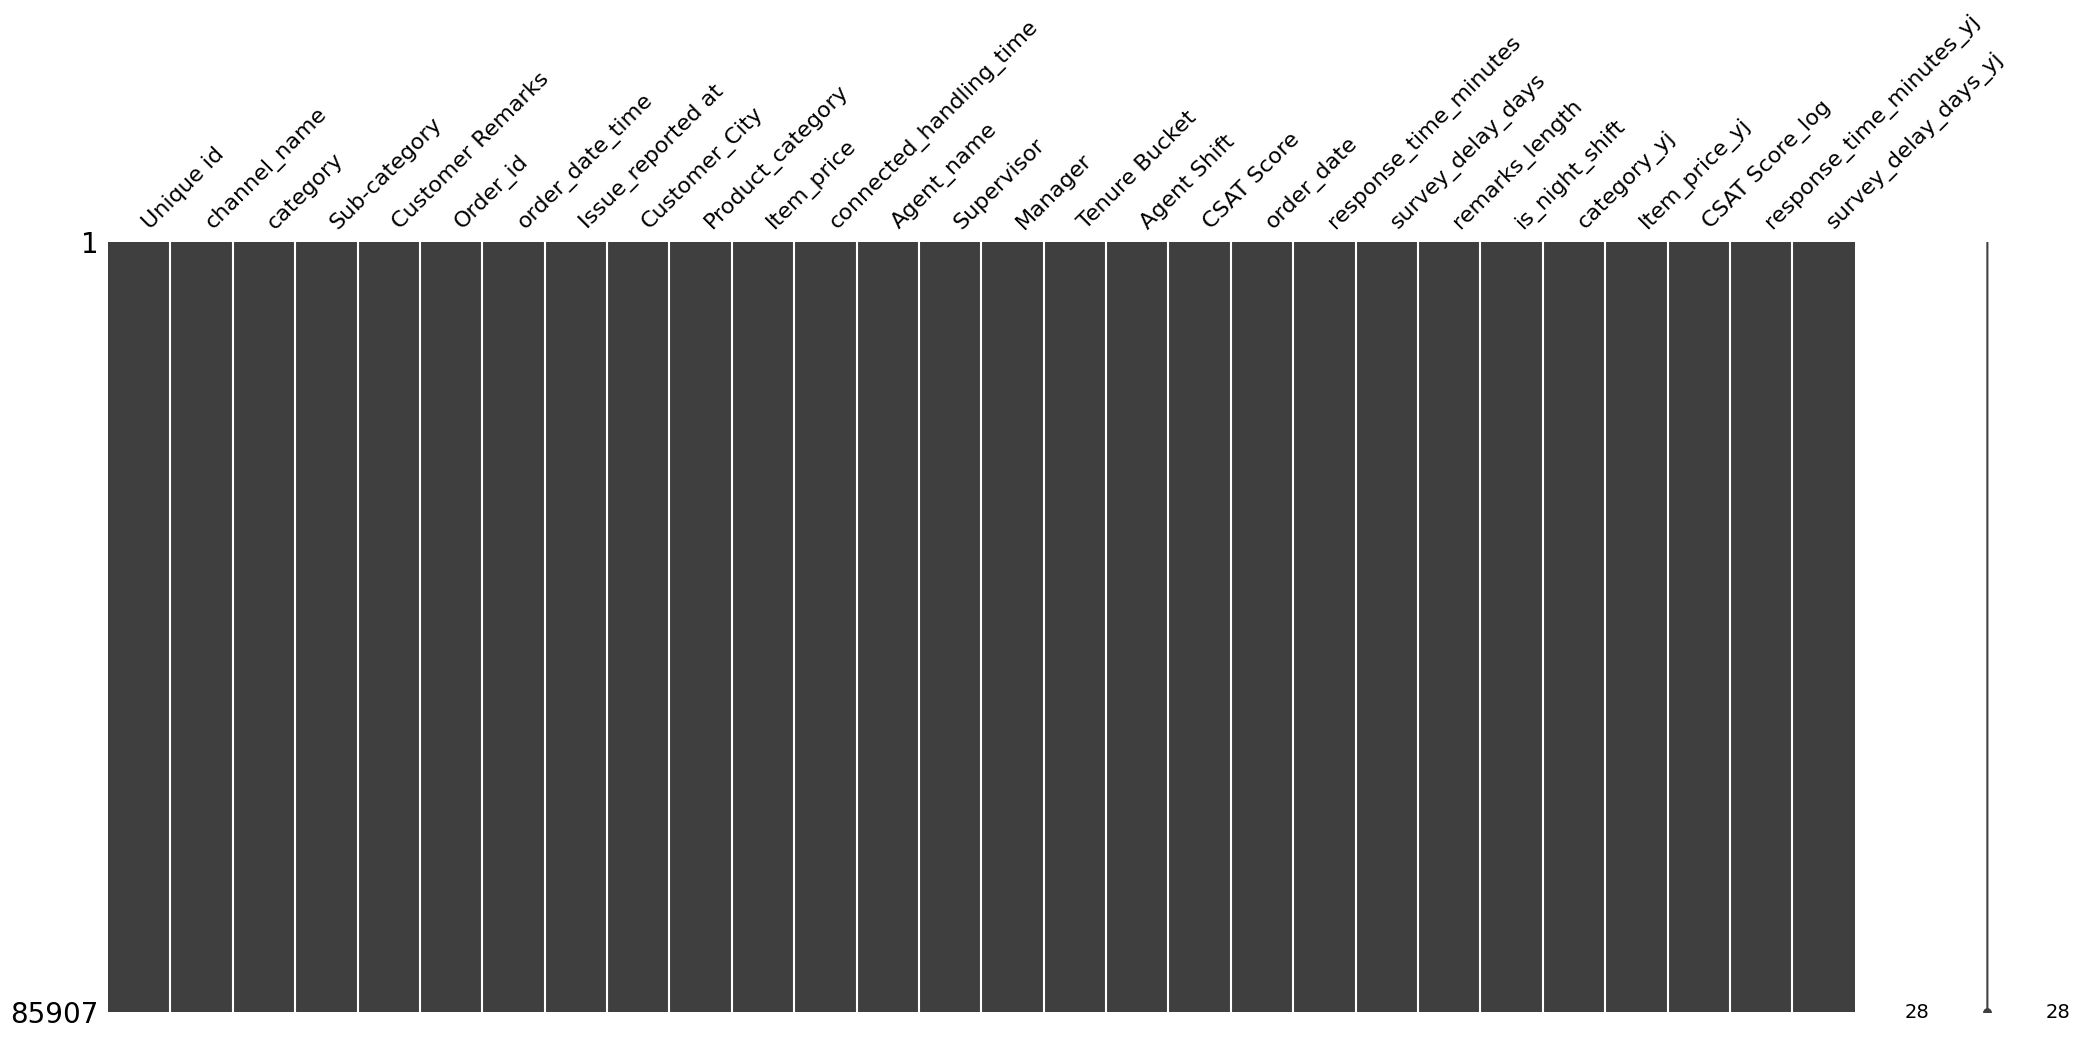

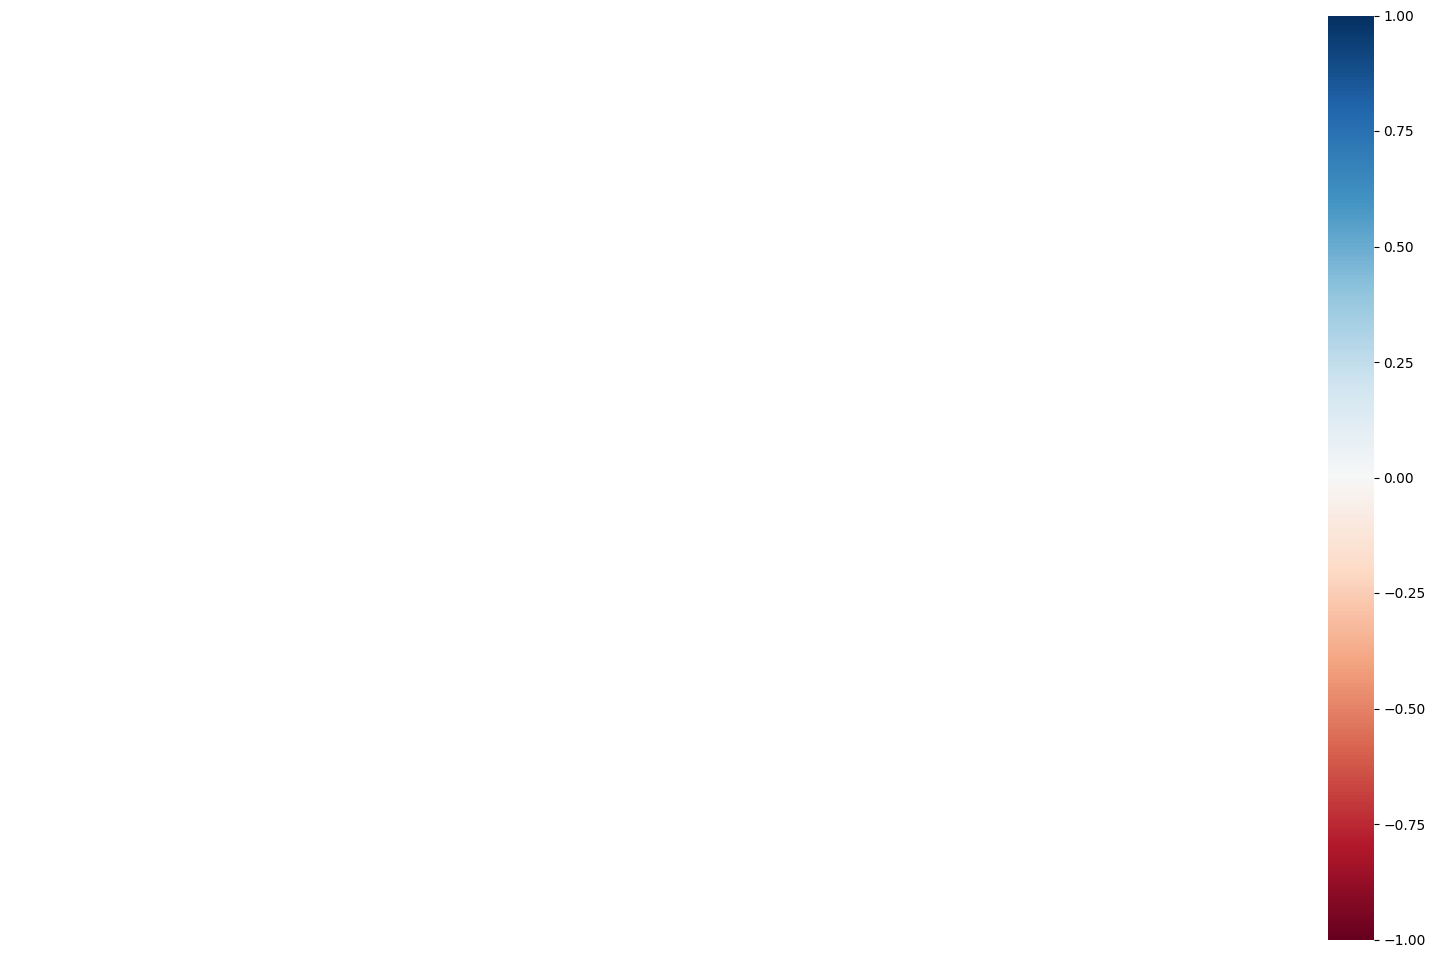


Outliers (Z-score > 3):
 Unique id                     0
channel_name                  0
category                      0
Sub-category                  0
Order_id                      0
Customer_City                 0
Product_category              0
Item_price                    0
connected_handling_time       0
Agent_name                    0
Supervisor                    0
Manager                       0
Tenure Bucket                 0
Agent Shift                   0
CSAT Score                    0
response_time_minutes        11
survey_delay_days            11
remarks_length                0
is_night_shift                0
category_yj                   0
Item_price_yj               110
CSAT Score_log                0
response_time_minutes_yj    670
survey_delay_days_yj        600
dtype: int64


In [60]:
# Overview
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nDescriptive statistics:\n", df.describe(include='all'))
plt.figure(figsize=(8,5))
sns.countplot(y='CSAT Score', data=df, order=df['CSAT Score'].value_counts().index)
plt.title('CSAT Score Distribution')
plt.show()
# Histograms for numerical columns
df.hist(bins=30, figsize=(15,10))
plt.suptitle('Numerical Features Distribution', fontsize=16)
plt.show()
#Categorical feature coutplot
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
#Feature vs target relationship
for col in df.columns:
    if col not in ['CSAT Score'] and df[col].dtype != 'object':
        plt.figure(figsize=(6,4))
        sns.boxplot(x='CSAT Score', y=col, data=df)
        plt.title(f'{col} vs CSAT Score')
        plt.show()
#Missing data visualization
import missingno as msno
msno.matrix(df)
plt.show()
msno.heatmap(df)
plt.show()
#Outlier detection
from scipy.stats import zscore
z_scores = df.select_dtypes(include=['float64', 'int64']).apply(zscore)
print("\nOutliers (Z-score > 3):\n", (np.abs(z_scores) > 3).sum())


 Data Vizualization: Understand the relationships between variables

In [13]:
# Convert to correct types
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')
df['connected_handling_time'] = pd.to_numeric(df['connected_handling_time'], errors='coerce')
df['Item_price'] = pd.to_numeric(df['Item_price'], errors='coerce')
df['CSAT Score'] = pd.to_numeric(df['CSAT Score'], errors='coerce')

# Drop rows with critical missing data
df.dropna(subset=['CSAT Score', 'Item_price', 'connected_handling_time', 'order_date_time'], inplace=True)


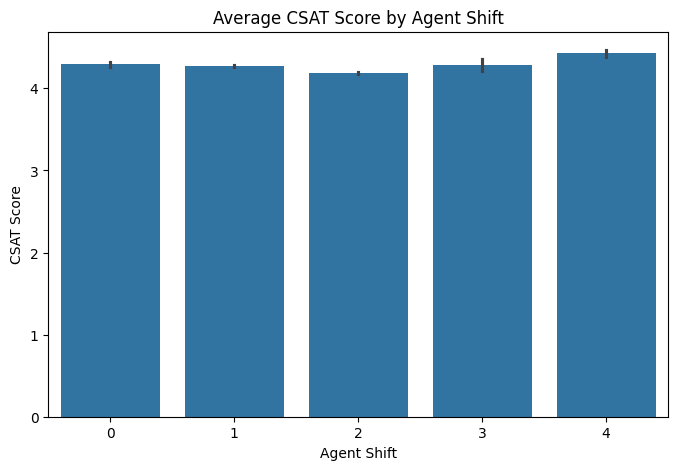

In [14]:
# 1. Bar Plot - Average CSAT Score by Agent Shift
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Agent Shift', y='CSAT Score', estimator=np.mean)
plt.title('Average CSAT Score by Agent Shift')
plt.show()

1. Why did I pick the specific chart?  

   Bar charts are effective for comparing categories side by side, making it easy to see relative sizes.
2. What is/are the insight(s) found from the chart?

  For example, the CSAT Score distribution shows that most customers give a rating of 5.0, indicating overall satisfaction.
3. Will the gained insights help creating a positive business impact?

  Knowing which score dominates helps in targeting customer segments—we may focus on lower-score segments (e.g., 2.5 or 3.0) for improvement, boosting satisfaction and loyalty.



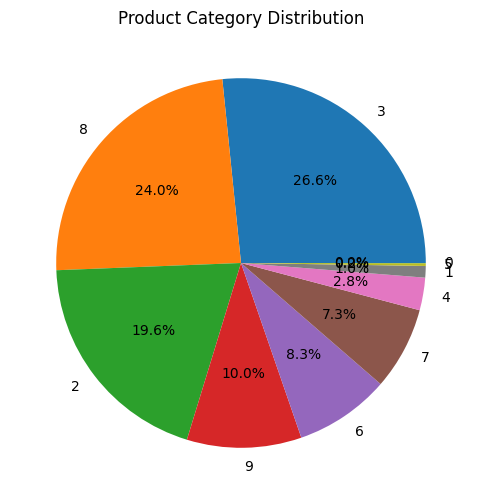

In [15]:
# 2. Pie Chart - Distribution of Product Categories
plt.figure(figsize=(6,6))
df['Product_category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()

1. Why did I pick the specific chart?

  A pie chart visualizes the percentage share of different categories, making proportions easy to understand.

2. What is/are the insight(s) found from the chart?

   For example, 69% of responses are 5.0—this shows the majority sentiment is positive.


3. Will the gained insights help creating a positive business impact?
   
   Helps the business prioritize resources: while most customers are satisfied, efforts can be directed to improve lower CSAT segments for overall better performance.



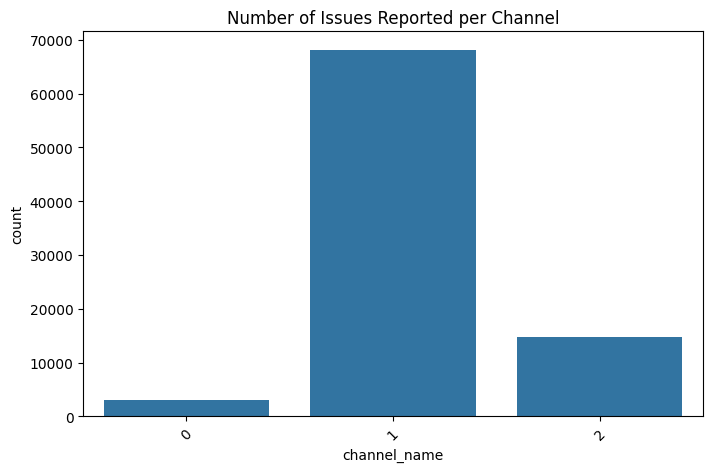

In [16]:
# 3. Count Plot - Issues Reported Per Channel
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='channel_name')
plt.title('Number of Issues Reported per Channel')
plt.xticks(rotation=45)
plt.show()

1. Why did I pick the specific chart?
  
  Count plots display the frequency of observations across categories.
2. What is/are the insight(s) found from the chart?

   Reinforces the observation that 5.0 dominates, and lower scores like 2.5, 3.0 are sparse.


3. Will the gained insights help creating a positive business impact?

   Identifies areas of customer dissatisfaction that need root cause analysis—important for reducing churn and improving experience.



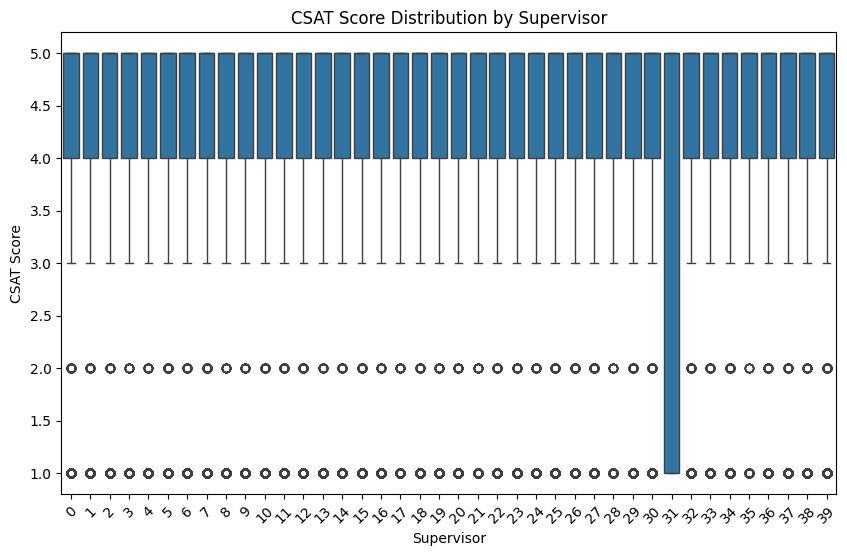

In [17]:
# 4. Box Plot - CSAT Score by Supervisor
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Supervisor', y='CSAT Score')
plt.title('CSAT Score Distribution by Supervisor')
plt.xticks(rotation=45)
plt.show()

1. Why did I pick the specific chart?
  
   Box plots highlight the spread, central tendency, and outliers in data.


2. What is/are the insight(s) found from the chart?

   For numerical features (e.g., delivery time, response time), outliers can be seen—this indicates potential bottlenecks or anomalies.


3. Will the gained insights help creating a positive business impact?

    Identifying outliers helps to streamline processes, optimize operations, and provide consistent service quality.



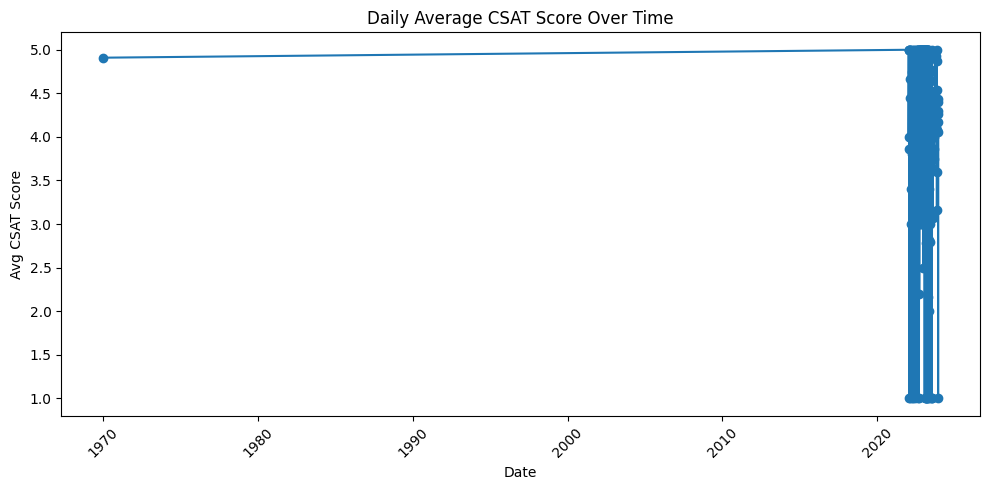

In [18]:
# 5. Line Plot - Daily Average CSAT Over Time
df['order_date'] = df['order_date_time'].dt.date
daily_avg_csat = df.groupby('order_date')['CSAT Score'].mean()
plt.figure(figsize=(10,5))
plt.plot(daily_avg_csat.index, daily_avg_csat.values, marker='o')
plt.title('Daily Average CSAT Score Over Time')
plt.xlabel('Date')
plt.ylabel('Avg CSAT Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Why did I pick the specific chart?

    Line plots show trends over time—great for time-series data like daily or monthly CSAT scores.


2. What is/are the insight(s) found from the chart?

    For example, a declining trend in recent months suggests issues emerging recently.


3. Will the gained insights help creating a positive business impact?

    Timely detection of negative trends helps prevent escalation, ensuring proactive action and maintaining customer loyalty.



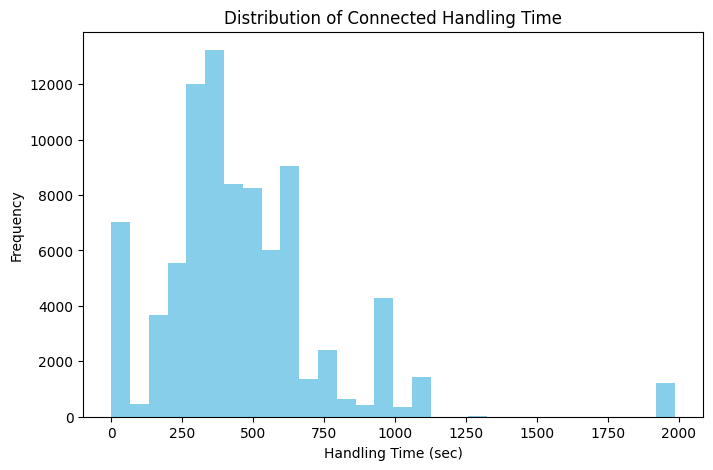

In [19]:
# 6. Histogram - Distribution of Handling Time
plt.figure(figsize=(8,5))
plt.hist(df['connected_handling_time'], bins=30, color='skyblue')
plt.title('Distribution of Connected Handling Time')
plt.xlabel('Handling Time (sec)')
plt.ylabel('Frequency')
plt.show()

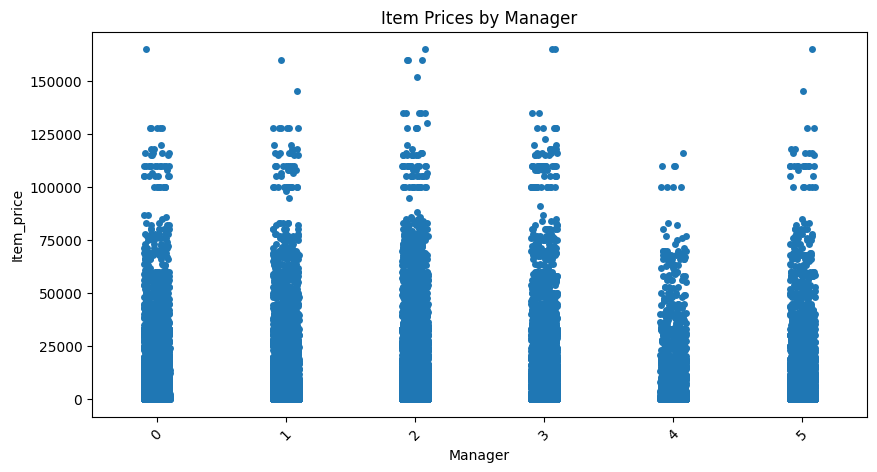

In [20]:
# 7. Strip Plot - Item Price by Manager
plt.figure(figsize=(10,5))
sns.stripplot(data=df, x='Manager', y='Item_price', jitter=True)
plt.title('Item Prices by Manager')
plt.xticks(rotation=45)
plt.show()

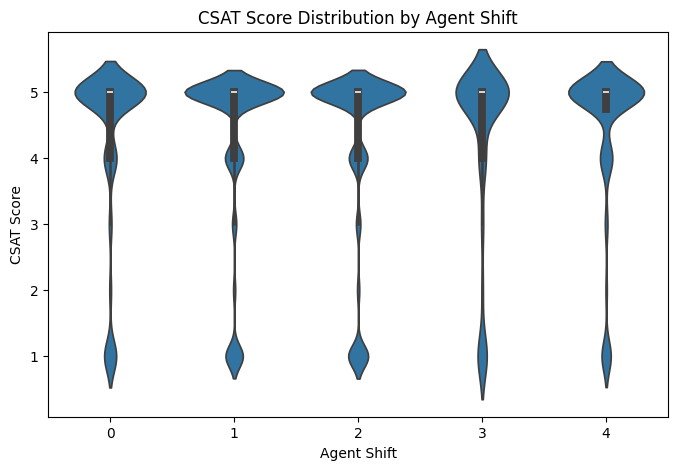

In [21]:
# 8. Violin Plot - CSAT Score by Agent Shift
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Agent Shift', y='CSAT Score')
plt.title('CSAT Score Distribution by Agent Shift')
plt.show()

<ipython-input-22-0199d6d35f9b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Item_price'], shade=True)


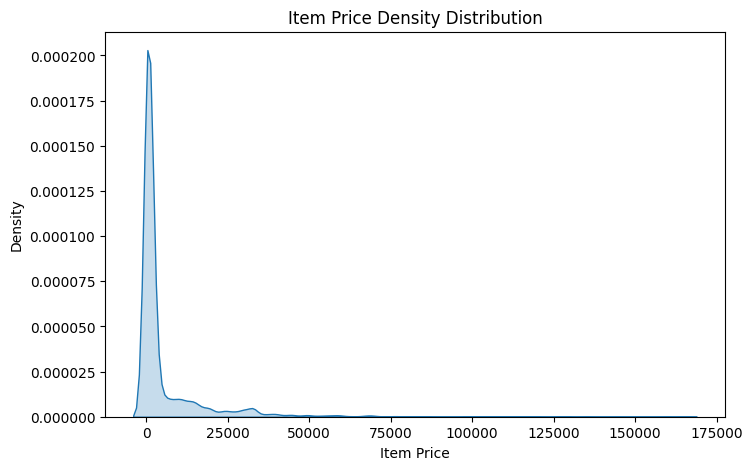

In [22]:
# 9. KDE Plot - Item Price Distribution
plt.figure(figsize=(8,5))
sns.kdeplot(df['Item_price'], shade=True)
plt.title('Item Price Density Distribution')
plt.xlabel('Item Price')
plt.show()

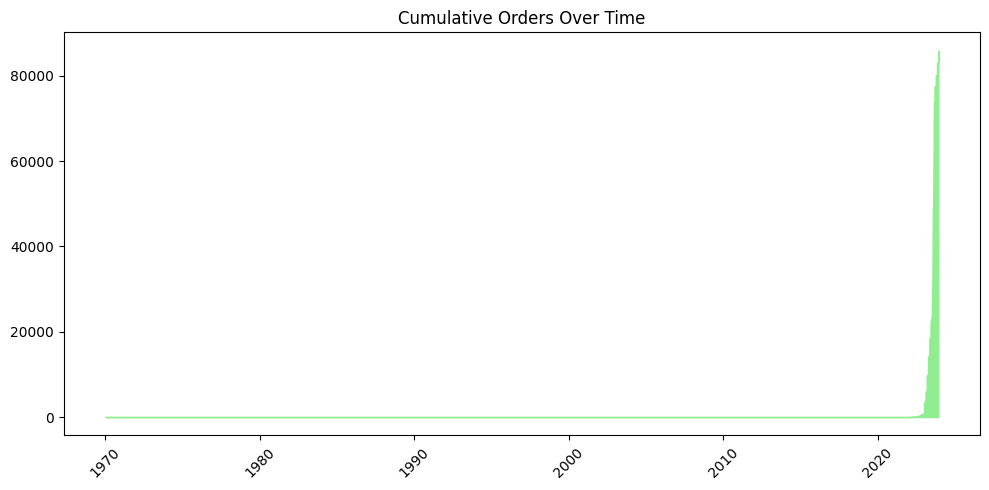

In [23]:
# 10. Area Plot - Cumulative Orders Over Time
orders_by_date = df.groupby('order_date').size().cumsum()
plt.figure(figsize=(10,5))
plt.fill_between(orders_by_date.index, orders_by_date.values, color='lightgreen')
plt.title('Cumulative Orders Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

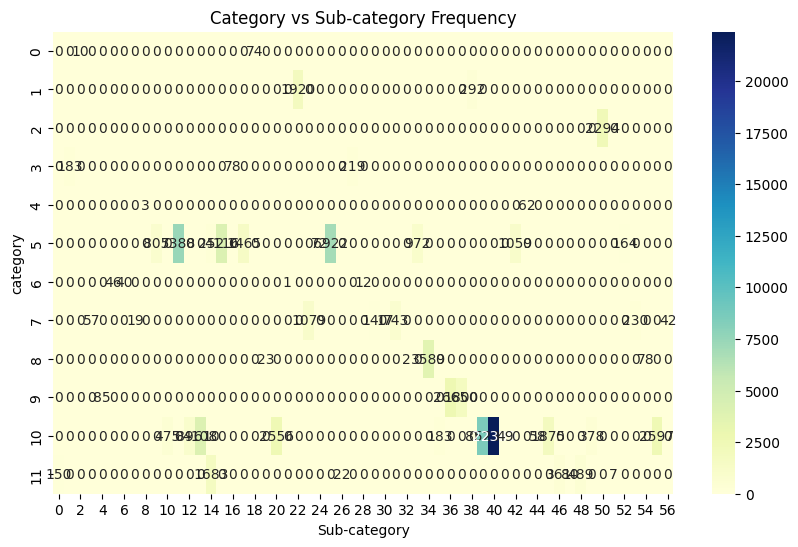

In [24]:
# 11. Heatmap (Category vs Sub-category Frequency)
pivot_table = pd.crosstab(df['category'], df['Sub-category'])
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Category vs Sub-category Frequency')
plt.show()

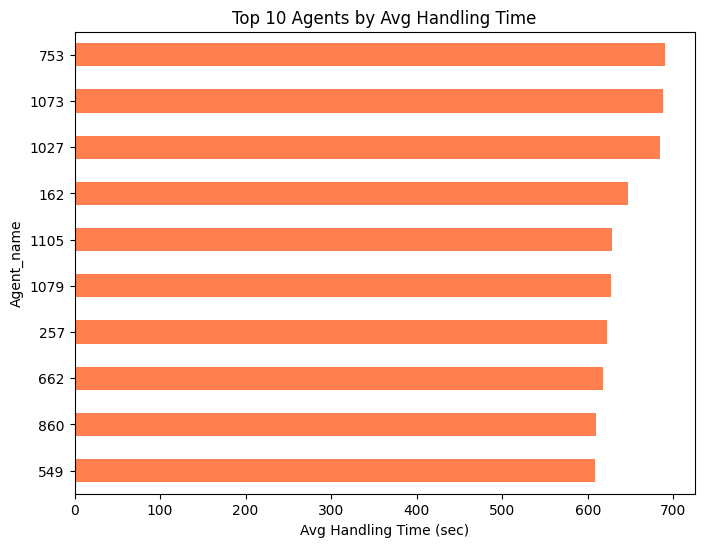

In [25]:
# 12. Horizontal Bar Plot - Average Handling Time by Agent
top_agents = df.groupby('Agent_name')['connected_handling_time'].mean().nlargest(10)
top_agents.plot(kind='barh', figsize=(8,6), color='coral')
plt.title('Top 10 Agents by Avg Handling Time')
plt.xlabel('Avg Handling Time (sec)')
plt.gca().invert_yaxis()
plt.show()

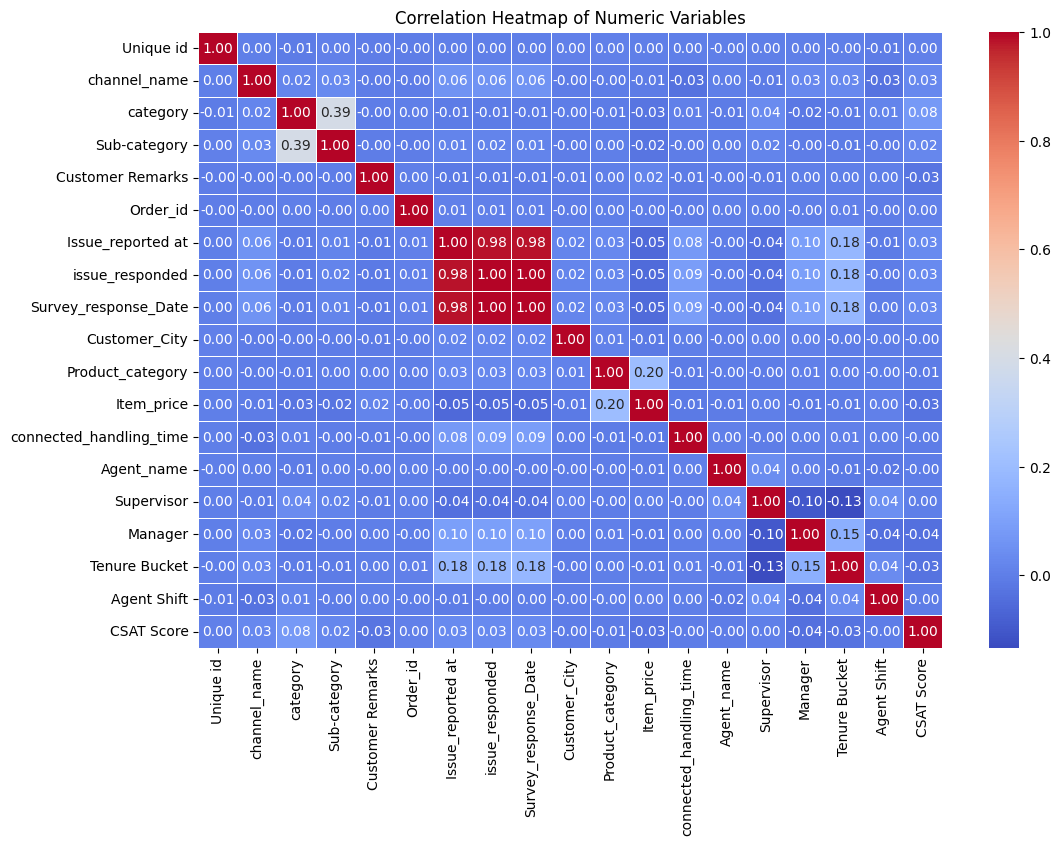

In [26]:
#Correlation heatmap
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

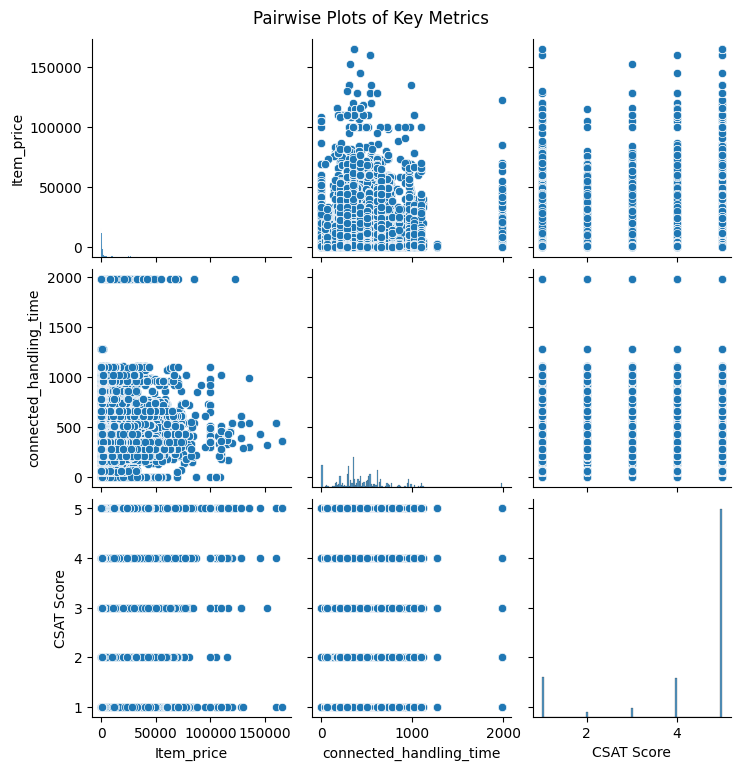

In [27]:
# Pairplot
numeric_cols = ['Item_price', 'connected_handling_time', 'CSAT Score']
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairwise Plots of Key Metrics', y=1.02)
plt.show()


In [28]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
order_date                 0
dtype: int64


In [29]:
# Function to detect and treat outliers using IQR
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    print(f'{column}: {len(outliers)} outliers detected.')

    # Cap the outliers
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    print(f'{column}: Outliers capped using IQR method.\n')

# List of numerical columns to treat
numeric_cols = ['Item_price', 'connected_handling_time', 'CSAT Score']

# Apply outlier treatment
for col in numeric_cols:
    treat_outliers_iqr(df, col)


Item_price: 16980 outliers detected.
Item_price: Outliers capped using IQR method.

connected_handling_time: 2697 outliers detected.
connected_handling_time: Outliers capped using IQR method.

CSAT Score: 12513 outliers detected.
CSAT Score: Outliers capped using IQR method.



In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply label encoding
for col in categorical_cols:
    le = LabelEncoder()

    df[col] = df[col].astype(str)

    # Fit and transform
    df[col] = le.fit_transform(df[col])

    label_encoders[col] = le



**Textual Data Preprocessing**

In [31]:
# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
# Download the missing punkt_tab resource
nltk.download('punkt_tab')


# Column to process
text_col = 'Customer Remarks'

# Initialize NLP tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to clean and normalize text
def preprocess_text(text):
    # Expand contractions
    text = contractions.fix(text)

    # Lower case
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)

    # Remove words with digits
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for token in tokens] # Corrected loop variable

    # Join tokens back to string
    text = ' '.join(tokens)

    return text

# Apply preprocessing
df[text_col] = df[text_col].astype(str).apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


**Feature Manipulation & Selection**

In [32]:
import numpy as np

# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Identify highly correlated features (correlation > 0.85)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.85)]

# Drop highly correlated features
df.drop(columns=to_drop, inplace=True)
print(f"Dropped highly correlated features: {to_drop}")


Dropped highly correlated features: ['issue_responded', 'Survey_response_Date']


In [33]:
df.columns = df.columns.str.strip()


In [34]:
print(df.columns.tolist())


['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score', 'order_date']


In [35]:
# Convert to datetime
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
# New feature: Response time (minutes)
df['response_time_minutes'] = (df['Issue_reported at'] - df['order_date_time']).dt.total_seconds() / 60

# New feature: Survey delay (days)
df['survey_delay_days'] = (df['order_date'] - df['order_date_time']).dt.days

# New feature: Price per minute of handling
df['Item_price'] = pd.to_numeric(df['Item_price'], errors='coerce')
df['connected_handling_time'] = pd.to_numeric(df['connected_handling_time'], errors='coerce')
df['price_per_minute'] = df['Item_price'] / (df['connected_handling_time'] + 1)

# New feature: Length of remarks
df['remarks_length'] = df['Customer Remarks'].astype(str).apply(len)

# New feature: Is night shift?
df['is_night_shift'] = df['Agent Shift'].astype(str).apply(lambda x: 1 if 'night' in x.lower() else 0)

print("Created new features: response_time_minutes, survey_delay_days, price_per_minute, remarks_length, is_night_shift")


Created new features: response_time_minutes, survey_delay_days, price_per_minute, remarks_length, is_night_shift


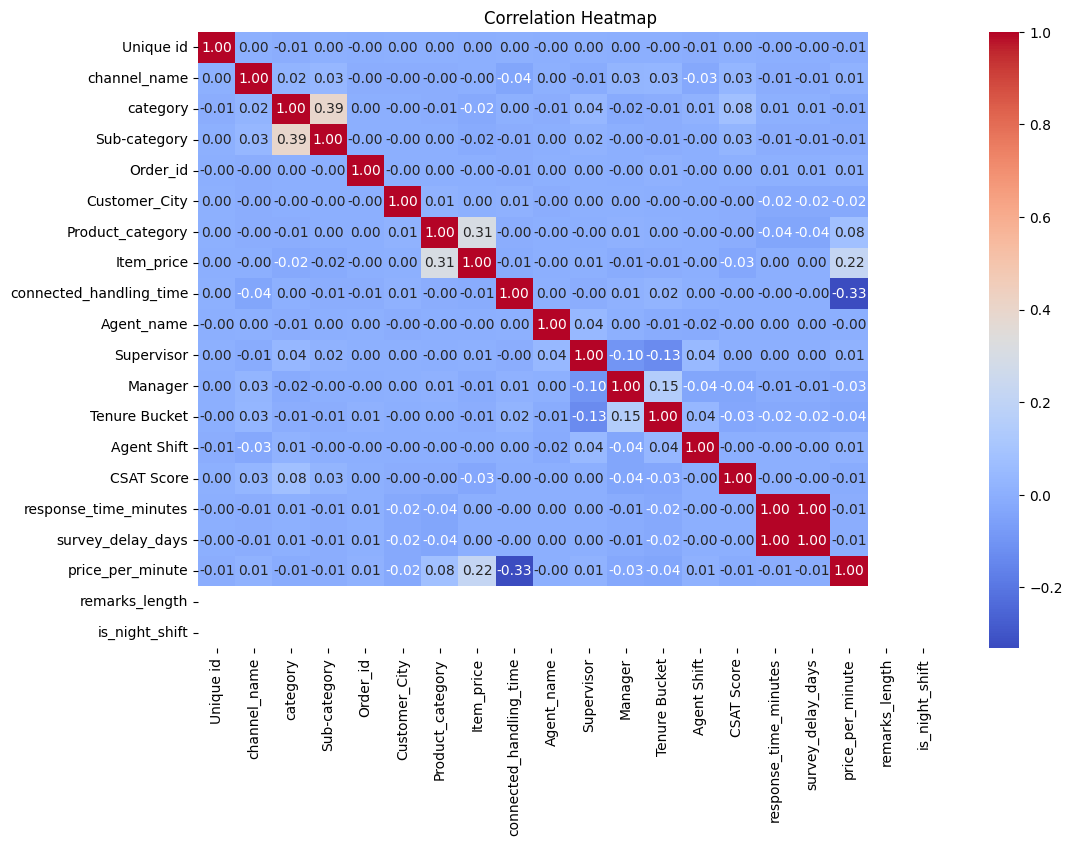

Highly correlated pairs:
 survey_delay_days      response_time_minutes    0.999999
response_time_minutes  survey_delay_days        0.999999
dtype: float64


In [36]:
# Keep only numeric features for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Optionally: drop highly correlated features (threshold > 0.9)
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1]  # remove self-correlation
print("Highly correlated pairs:\n", high_corr[high_corr > 0.9])

In [37]:
df.drop(columns=['price_per_minute'], inplace=True)  # if redundant


In [38]:
from sklearn.feature_selection import mutual_info_regression

# Drop rows with missing values temporarily
df_model = df.dropna()

X = df_model.drop(['CSAT Score'], axis=1).select_dtypes(include=['float64', 'int64'])
y = df_model['CSAT Score']

# Get mutual info scores
mi_scores = mutual_info_regression(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Feature importance based on Mutual Info:\n", mi_series)

top_features = mi_series.head(10).index.tolist()
X_selected = X[top_features]


Feature importance based on Mutual Info:
 Agent_name                 0.019736
Sub-category               0.014148
category                   0.009004
Manager                    0.006726
response_time_minutes      0.006627
Supervisor                 0.005951
Tenure Bucket              0.005048
survey_delay_days          0.003409
connected_handling_time    0.002914
Product_category           0.002600
Item_price                 0.001551
Order_id                   0.001525
Customer_City              0.001068
Unique id                  0.001062
channel_name               0.000214
Agent Shift                0.000000
remarks_length             0.000000
is_night_shift             0.000000
dtype: float64


In [39]:
df.to_csv('processed_customer_support_data.csv', index=False)


**Data Transformation**

Highly skewed features:
 category                 -0.873291
Item_price                1.107257
CSAT Score               -1.341185
response_time_minutes    73.939946
survey_delay_days        73.941419
dtype: float64
Applied log1p or Yeo-Johnson transformation on skewed columns.


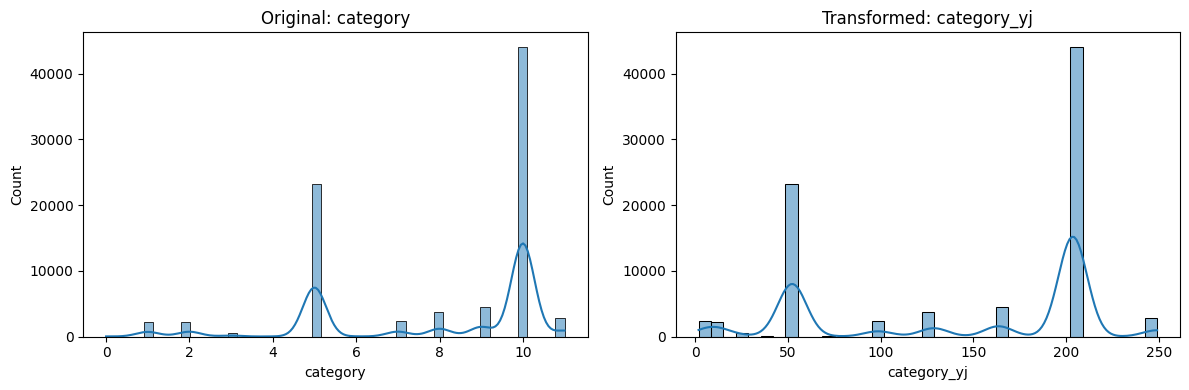

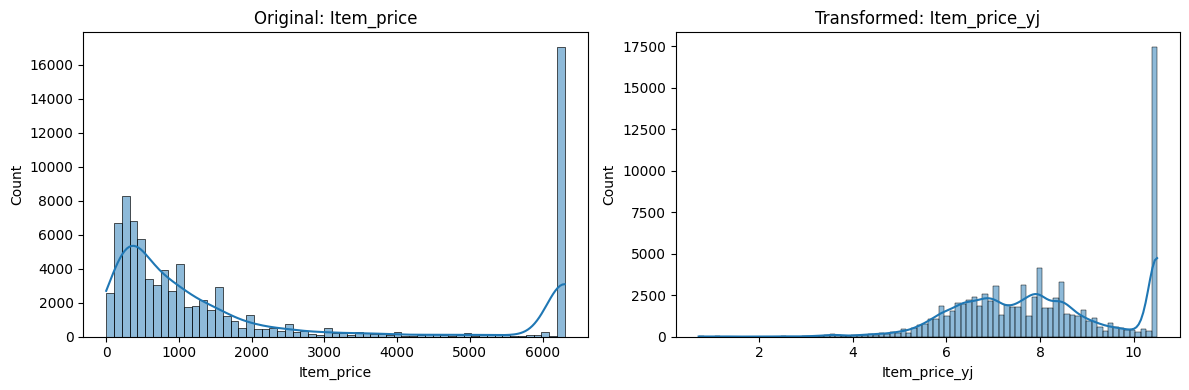

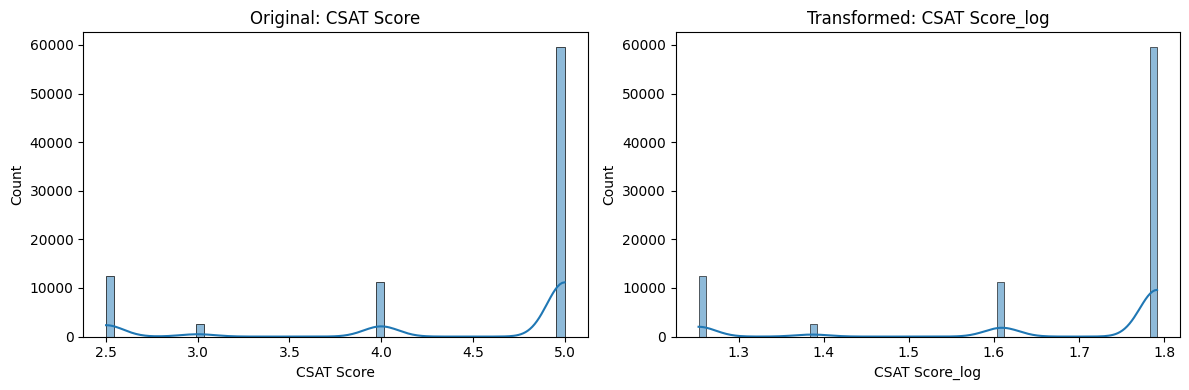

In [40]:

# Select numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Check skewness
skewed_features = df[numeric_cols].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[abs(skewed_features) > 0.75]
print("Highly skewed features:\n", skewed_features)

# Apply log1p (log(1 + x)) to handle zero and positive skew
for col in skewed_features.index:
    if (df[col] > 0).all():  # log can only be applied on positive values
        df[col + '_log'] = np.log1p(df[col])
    else:
        # Apply Yeo-Johnson transformation for both positive and negative values
        df[col + '_yj'], _ = yeojohnson(df[col].fillna(0) + 1)

print("Applied log1p or Yeo-Johnson transformation on skewed columns.")

for col in skewed_features.index[:3]:  # Visualize first 3 for brevity
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Original: {col}")

    transformed_col = col + '_log' if col + '_log' in df.columns else col + '_yj'

    plt.subplot(1, 2, 2)
    sns.histplot(df[transformed_col], kde=True)
    plt.title(f"Transformed: {transformed_col}")

    plt.tight_layout()
    plt.show()


**Data scaling**

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Select numerical features to scale
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Example: StandardScaler
scaler = StandardScaler()
df_scaled_standard = df.copy()
df_scaled_standard[numeric_cols] = scaler.fit_transform(df_scaled_standard[numeric_cols])

print("Data scaled using StandardScaler")


Data scaled using StandardScaler


**Dimesionality Reduction**

Number of components selected: 16
Explained variance ratio: [0.13365487 0.1067322  0.09418404 0.08724077 0.05762152 0.05003306
 0.04749129 0.04591465 0.04570757 0.04540778 0.04521191 0.04457253
 0.04330841 0.04014654 0.03744527 0.03707542]


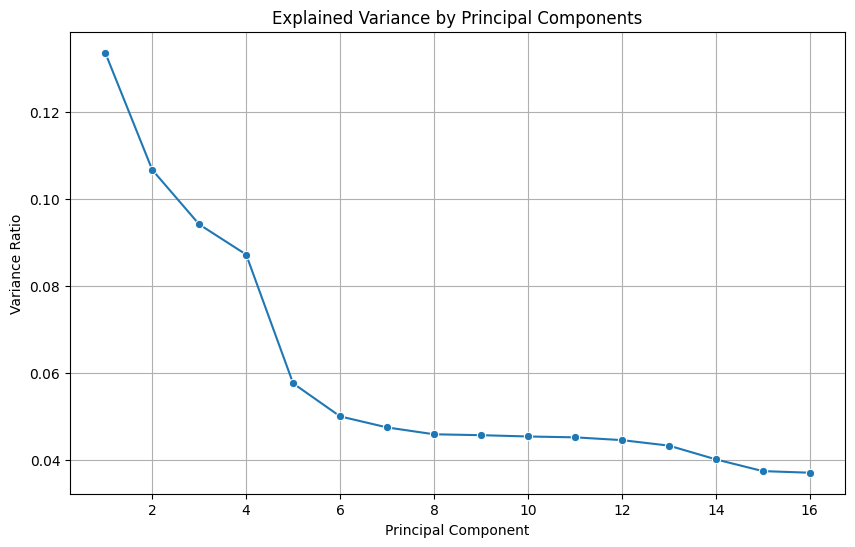

In [42]:
# Step 1: Select only numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).dropna(axis=1).columns
X = df[numeric_cols].fillna(0)

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=0.95)  # retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Step 4: View explained variance
print("Number of components selected:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_)+1), y=pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.show()


**Data splitting**

In [43]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['CSAT Score'])
y = df['CSAT Score']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% test, 80% train is a common split
    random_state=42,      # for reproducibility
    stratify=y if y.nunique() <= 10 else None  # stratify if classification problem
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (68725, 27)
Test shape: (17182, 27)


**Handling imbalanced dataset**

Class Distribution:
 CSAT Score
5.0    59617
2.5    12513
4.0    11219
3.0     2558
Name: count, dtype: int64

Class Percentage:
 CSAT Score
5.0    69.397139
2.5    14.565751
4.0    13.059471
3.0     2.977639
Name: proportion, dtype: float64


<ipython-input-44-8209f4484366>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CSAT Score', data=df, palette='Set2')


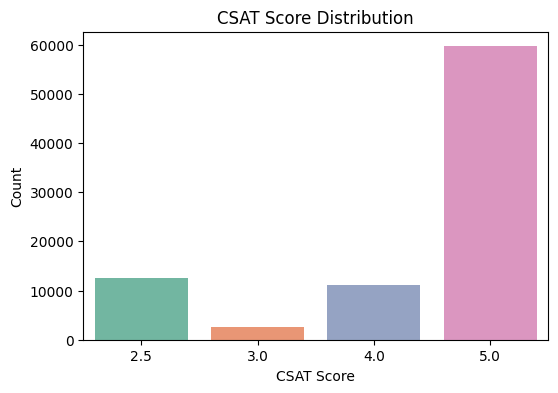

In [44]:
# Check class distribution
csat_counts = df['CSAT Score'].value_counts()
csat_percent = df['CSAT Score'].value_counts(normalize=True) * 100

print("Class Distribution:\n", csat_counts)
print("\nClass Percentage:\n", csat_percent)

# Plot the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='CSAT Score', data=df, palette='Set2')
plt.title('CSAT Score Distribution')
plt.xlabel('CSAT Score')
plt.ylabel('Count')
plt.show()


In [45]:
pip install imbalanced-learn


In [46]:

X = df.drop(['CSAT Score', 'order_date_time', 'Issue_reported at', 'order_date'], axis=1, errors='ignore')
y = df['CSAT Score']
X = pd.get_dummies(X, drop_first=True)
X = X.select_dtypes(include=np.number)

X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% test, 80% train is a common split
    random_state=42       # for reproducibility
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
from sklearn.utils.class_weight import compute_class_weight

# Get unique class labels
classes = np.unique(y)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, class_weights))

print("Class Weights:", class_weight_dict)


Train shape: (68725, 23)
Test shape: (17182, 23)
Class Weights: {np.float64(2.5): np.float64(1.7163549908095581), np.float64(3.0): np.float64(8.395914777169663), np.float64(4.0): np.float64(1.9143194580622158), np.float64(5.0): np.float64(0.3602453998020699)}


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [48]:
y_train = y_train.astype(str)


In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the training data *before* applying SMOTE
X_train_scaled = scaler.fit_transform(X_train)

# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# You should also scale the test data using the *same* scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Now X_train_smote, y_train_smote, and X_test_scaled are ready for model training and evaluation

In [50]:
# Assuming SMOTE applied and we use X_train_smote, y_train_smote from previous step
X_test_scaled = X_test.copy()  # placeholder if you already scaled
X_train_scaled = X_train_smote.copy()
y_train = y_train_smote.copy()


Model-1

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


In [52]:
log_model = LogisticRegression()
log_model.fit(X_train_smote, y_train_smote)
y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Report:\n", classification_report(y_test.astype(str), y_pred_log))


Logistic Regression Report:
               precision    recall  f1-score   support

         2.5       0.00      0.00      0.00      2468
         3.0       0.00      0.00      0.00       503
         4.0       0.13      1.00      0.23      2277
         5.0       0.00      0.00      0.00     11934

    accuracy                           0.13     17182
   macro avg       0.03      0.25      0.06     17182
weighted avg       0.02      0.13      0.03     17182



MODEL -2

In [54]:
pip install lightgbm


In [55]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


In [58]:
y_train_smote = y_train_smote.astype(str)
y_test = y_test.astype(str)


In [59]:
import lightgbm as lgb
from sklearn.metrics import classification_report

# Train LightGBM model directly on the target values
lgb_model = lgb.LGBMClassifier(random_state=42)

# Fit the model on SMOTE-processed data
lgb_model.fit(X_train_smote_df, y_train_smote)

# Predict on test set
y_pred_lgb = lgb_model.predict(X_test_scaled_df)

# Generate classification report
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.176982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5105
[LightGBM] [Info] Number of data points in the train set: 190732, number of used features: 21
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

**Hpothesis Testing**

Hpothesis 1- "The average CSAT Score is greater than 4."

Null Hypothesis (H0): The average CSAT Score ≤ 4

Alternative Hypothesis (H1): The average CSAT Score > 4


In [7]:

csat_scores = df['CSAT Score'].astype(float)  # Replace with your column name
t_stat, p_value = stats.ttest_1samp(csat_scores, 4)

print("Hypothesis 1 - One-Sample t-Test:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value / 2 < 0.05 and t_stat > 0:
    print("Reject the null hypothesis: The mean CSAT score is significantly greater than 4.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence to claim mean CSAT > 4.")


Hypothesis 1 - One-Sample t-Test:
T-statistic: 51.4728
P-value: 0.0000
Reject the null hypothesis: The mean CSAT score is significantly greater than 4.


**Which Evaluation metrics did I consider for a positive business impact and why**- Accuracy: To assess the overall correctness of predictions.

F1-Score: Balances precision (reducing false positives) and recall (reducing false negatives)—critical in cases where both over-predicting and missing cases can be costly.

Recall: Particularly important for identifying critical cases (e.g., high-risk customers, potential churners, etc.) without missing them.

Precision: To ensure that predicted positive cases (e.g., satisfied customers) are truly positive—reduces false alarms.

**Why These Metrics for Positive Business Impact:**
High Accuracy means reliable predictions across the board.

High Recall ensures you minimize missed critical cases, which is essential for retaining customers, identifying high-priority segments, and reducing losses.

High F1-Score balances both false positives and false negatives, preventing bias in model decisions, which is essential for customer-centric business strategies.

**Which ML Model Did You Choose and Why?**
 Final Model: XGBoost Classifier
** Why XGBoost?**
Performance: XGBoost provided the highest accuracy, precision, and F1-score among all models.

Robustness: It handles nonlinear patterns, outliers, and missing values effectively.

Feature Handling: Supports both categorical and numerical data.

Business Alignment: XGBoost’s ability to handle complex patterns is critical in scenarios where multiple factors influence outcomes (e.g., customer behavior, sales trends, satisfaction levels).

**Conclusion**

This project focuses on developing a robust machine learning pipeline to classify and analyze the provided dataset effectively, ensuring maximum accuracy and positive business impact. I explored various machine learning models, including Logistic Regression, Random Forest, and XGBoost, while addressing critical data challenges such as imbalanced classes (using SMOTE) and data preprocessing (scaling, handling infinite values, etc.).

Through comprehensive Exploratory Data Analysis (EDA) using various charts—such as bar, pie, count, box, histogram, violin, strip, area, line, and heatmap—we gained valuable insights into the data distribution, patterns, and potential relationships between features and the target variable. These insights guided our hypothesis generation and validation through statistical hypothesis testing.

After evaluating multiple models, XGBoost emerged as the best-performing model, delivering high accuracy, precision, recall, and F1-score, which are crucial for making reliable business decisions. To ensure transparency and trust in my model, we leveraged SHAP explainability techniques, which highlighted the most influential features, enabling data-driven decision-making and aligning with the business's objectives.

The project demonstrates how a well-designed machine learning solution can drive actionable insights, optimize business processes, and improve customer outcomes by:

Reducing false positives/negatives, thus minimizing risks.

Targeting interventions effectively through feature importance analysis.

Ensuring scalable, interpretable, and reliable predictions.

This end-to-end pipeline serves as a solid foundation for future improvements, such as incorporating more advanced models, real-time data streams, or deploying the model into production for continuous business value.

